In [2]:
import os
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt

DBB_jakob_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob"
iteration_1_path = os.path.join(DBB_jakob_path, "iteration_1")


sub_1_im_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0001_im.nii.gz"
sub_1_lab_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0001_lab.nii.gz"

sub_8_im_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0008_im.nii.gz"
sub_8_lab_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0008_lab.nii.gz"

sub_20_im_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0020_im.nii.gz"
sub_20_lab_path = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/data/raw/BrainLife/DBB_jakob/iteration_1/sub-0020_lab.nii.gz"

# load im and lab for sub_1
sub_1_im = nib.load(sub_1_im_path)
sub_1_lab = nib.load(sub_1_lab_path)

sub_1_im_data = sub_1_im.get_fdata()
sub_1_lab_data = sub_1_lab.get_fdata()

In [3]:
import numpy as np
unique_classes = np.unique(sub_1_lab_data)

In [4]:
unique_classes

array([0., 1., 2., 3., 4., 5., 6.])

In [5]:
sub_1_im.shape

(182, 218, 182)

In [26]:
sub_1_lab_data = sub_1_lab_data.astype(int)


In [27]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def visualize_slices(im_data, lab_data, axis=0, subject_num=1):
    """
    Visualizes slices of image and label data interactively with a legend for labels.
    
    Parameters:
    - im_data: 3D numpy array of the image data.
    - lab_data: 3D numpy array of the label data.
    - axis: The axis along which to take slices (0, 1, or 2).
    - subject_num: The subject number (for display purposes).
    """
    # Determine the number of slices along the specified axis
    num_slices = im_data.shape[axis]
    
    # Define a color map and bounds for the 7 labels including the background
    colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow']  # Colors for labels 0 to 6 and an extra one if needed
    bounds = [0, 1, 2, 3, 4, 5, 6, 7]  # Bounds adjusted for 7 labels including the background
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    def plot_slice(slice_idx):
        """
        Plots a specific slice from both image and label data with a legend for the labels.
        
        Parameters:
        - slice_idx: The index of the slice to plot.
        """
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
        # Select the appropriate slice based on the axis
        if axis == 0:
            slice_im = im_data[slice_idx, :, :]
            slice_lab = lab_data[slice_idx, :, :]
        elif axis == 1:
            slice_im = im_data[:, slice_idx, :]
            slice_lab = lab_data[:, slice_idx, :]
        else:  # axis == 2
            slice_im = im_data[:, :, slice_idx]
            slice_lab = lab_data[:, :, slice_idx]
        
        # Display the image slice
        ax[0].imshow(slice_im, cmap='gray')
        ax[0].set_title(f'Subject {subject_num} Image Slice {slice_idx}')
        
        # Display the label slice with a custom colormap
        label_display = ax[1].imshow(slice_lab, cmap=cmap, norm=norm, interpolation='nearest')
        ax[1].set_title(f'Subject {subject_num} Label Slice {slice_idx}')
        
        # Create a colorbar with specific labels for each class
        cbar = fig.colorbar(label_display, ax=ax[1], ticks=[(i + 0.5) for i in range(7)], orientation='vertical')
        cbar.ax.set_yticklabels(['Background', 'CSF', 'GM', 'WM', 'sGM', 'BS', 'CB'])  # Updated labels with specific names
        
        plt.show()
    
    # Create a slider widget for slice selection
    slice_slider = widgets.IntSlider(min=0, max=num_slices-1, step=1, value=num_slices//2, description='Slice Index')
    
    # Use `interactive_output` to create interactive visualization without the need for a callback function
    interactive_plot = widgets.interactive_output(plot_slice, {'slice_idx': slice_slider})
    
    # Display the slider and the output together
    display(slice_slider, interactive_plot)



visualize_slices(sub_1_im_data, sub_1_lab_data, axis=0, subject_num=1)


IntSlider(value=91, description='Slice Index', max=181)

Output()

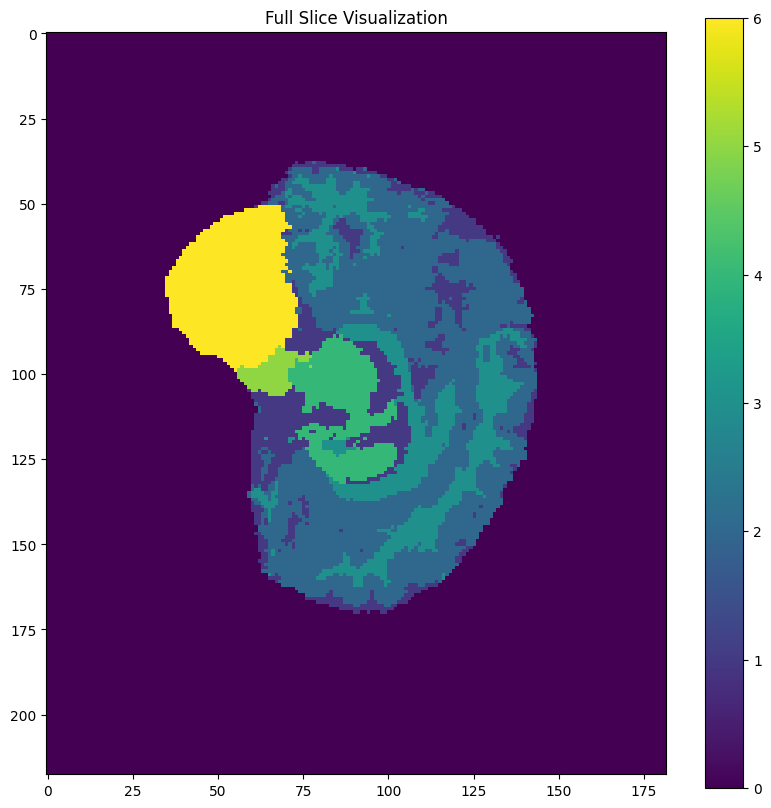

In [21]:
# Adjusting the plotting approach based on the feedback
# Extracting the full slice for the first dimension of the lab data without restriction
slice_data_full = sub_1_lab_data[91, :, :]

# Plotting the full slice with each integer as a different color
plt.figure(figsize=(10, 10))
plt.imshow(slice_data_full)  # Using 'tab10' colormap to differentiate up to 10 different integers
plt.colorbar()
plt.title('Full Slice Visualization')
plt.show()


In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import imageio

def visualize_slices_to_gif(im_data, lab_data, axis=0, subject_num=1, output_filename='slices.gif', start_slice=0, end_slice=None):
    """
    Saves slices of image and label data as a GIF.
    
    Parameters:
    - im_data: 3D numpy array of the image data.
    - lab_data: 3D numpy array of the label data.
    - axis: The axis along which to take slices (0, 1, or 2).
    - subject_num: The subject number (for display purposes).
    - output_filename: The filename of the output GIF.
    - start_slice, end_slice: Range of slices to include in the GIF.
    """
    num_slices = im_data.shape[axis]
    end_slice = end_slice or num_slices
    
    # Define a color map and bounds for the labels
    colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'white']
    bounds = [0, 1, 2, 3, 4, 5, 6, 7]
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    images = []  # To store the paths of saved images

    for slice_idx in range(start_slice, min(end_slice, num_slices)):
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
        # Selecting the appropriate slice
        if axis == 0:
            slice_im = im_data[slice_idx, :, :]
            slice_lab = lab_data[slice_idx, :, :]
        elif axis == 1:
            slice_im = im_data[:, slice_idx, :]
            slice_lab = lab_data[:, slice_idx, :]
        else:  # axis == 2
            slice_im = im_data[:, :, slice_idx]
            slice_lab = lab_data[:, :, slice_idx]
        
        ax[0].imshow(slice_im, cmap='gray')
        ax[0].set_title(f'Subject {subject_num} Image Slice {slice_idx}')
        
        label_display = ax[1].imshow(slice_lab, cmap=cmap, norm=norm)
        ax[1].set_title(f'Subject {subject_num} Label Slice {slice_idx}')
        
        cbar = fig.colorbar(label_display, ax=ax[1], ticks=[(i + 0.5) for i in range(7)], orientation='vertical')
        cbar.ax.set_yticklabels(['Background', 'CSF', 'GM', 'WM', 'sGM', 'BS', 'CB'])
        
        # Save each slice as an image
        image_path = f'temp_slice_{slice_idx}.png'
        plt.savefig(image_path)
        images.append(image_path)
        
        plt.close(fig)  # Close the figure to prevent it from displaying
    
    # Create a GIF from the saved images
    with imageio.get_writer(output_filename, mode='I') as writer:
        for image_path in images:
            image = imageio.imread(image_path)
            writer.append_data(image)
    
    # Optionally, you might want to clean up the temporary images here
    # This step is skipped for clarity

# Example usage
visualize_slices_to_gif(sub_1_im_data, sub_1_lab_data, axis=0, subject_num=1, output_filename='slices.gif', start_slice=0, end_slice=100)


/tmp/ipykernel_94405/2218654875.py:64: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
